# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Iman Solehudin
- **Email:** iman190301@gmail.com
- **ID Dicoding:** Iman Solehudin

## Menentukan Pertanyaan Bisnis

- Musim mana yang menunjukkan penyewaan sepeda tertinggi dan terendah?
- Pada hari apa jumlah penggunaan penyewaan sepeda paling banyak? hari kerja atau hari libur dan/atau akhir pekan?
- Mana pengguna yang lebih banyak, casual atau registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
file = files.upload() # Upload dataset

Saving data_1.csv to data_1.csv


- Tahap pertama setelah import library yang diperlukan adalah upload dataset dengan menggunakan function files.upload()

In [3]:
day_df = pd.read_csv(io.StringIO(file['data_1.csv'].decode('utf-8'))) # Membaca Dataset data_1.csv
day_df.head() # Menampilkan 5 baris teratas dari dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kode diatas berfungsi untuk menampilkan 5 baris pertama dari dataset Bike Sharing yang diagregasi setiap hari. Dataset tersebut memiliki 16 kolom.

### Assessing Data

In [4]:
day_df.info() # Menampilkan rangkuman keseluruhan dataset (Jumlah baris dan kolom, Nama kolom, Tipe kolom, dan Jumlaj Kolom Non-Null).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Pada tahap ini menampilkan informasi ringkas tentang DataFrame dengan menggunakan function df.info().
- Didapat jumlah data dataframe pada day_df ada 731 baris dengan 16 kolom, dan tidak terdapat data yang missing value.
- Namun, terdapat kesalah tipe pada kolom dtday yang seharusnya direpresentasikan sebagai data datetime.


In [5]:
__builtins__.print("Jumlah Duplikasi: ", day_df.duplicated().sum()) # Menampilkan apakah ada duplikasi data
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tahap ini adalah untuk mengetahui apakah terdapat data yang duplikat. Dan data tersebut tidak terdapat data yang duplikat.


### Cleaning Data

In [6]:
# Mengubah tipe data pada kolom "dteday" menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Berdasarkan proses asessing, tipe data pada kolom dteday harus diubah dari object menjadi datetime menggunakan function to_datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Dari total penggunaan paling banyak per harinya, kategori pengguna registered (6946 pengguna) lebih banyak dibanding kategori pengguna casual (3410)
- Jumlah total sepeda sewaan paling banyak dalam satu hari sebanyak 8714 sepeda (termasuk kategori casual dan registered) yang tersewakan.

In [10]:
# Grouping dan Aggregasi DataFrame

# Kode berikut digunakan untuk melakukan pengelompokan (`groupby`) berdasarkan kolom `season` pada DataFrame `day_df` dan menghitung agregasi untuk beberapa kolom tertentu:

day_df.groupby(by="season").agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

,instant,casual,registered,cnt
season,,,,
1,181,60622,410726,471348
2,184,203522,715067,918589
3,188,226091,835038,1061129
4,178,129782,711831,841613


- Pada tahap ini yaitu membuat pivot tabel menggunakan metode groupby() diikuti metode agg() yang memuat informasi jumlah penyewaan sepeda (casual & registered) tertinggi berdasarkan musim untuk mengetahui dimusim mana jumlah penyewaan tertinggi dan terendah.
- Keterangan musim yang terdapat dalam dataset tersebut sebagai berikut: (1=musim semi, 2=musim panas, 3=musim gugur, 4=musim dingin)
- Jumlah pengguna paling banyak yaitu pengguna registered.
- Jumlah penyewaan tertinggi berdasarkan musim yaitu pada musim gugur (1061129 unit) dan terendah pada musim semi (471348 unit)

In [12]:
# Grouping dan Aggregasi Berdasarkan `workingday`

# Kode berikut digunakan untuk mengelompokkan (`groupby`) data berdasarkan kolom `workingday` dalam DataFrame `day_df`, dan menghitung agregasi pada beberapa kolom:

day_df.groupby(by="workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


- Dari pivot tabel diatas didapat informasi bahwa hari kerja (1) lebih banyak penyewaan sepeda yaitu 2292410 unit dibandingkan dengan hari libur (0) dimana penyewaan sepeda hanya 1000269 unit.

In [13]:
# Menghitung total 'casual' dan 'registered'
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Membuat DataFrame baru dengan total 'casual' dan 'registered'
rental_summary = pd.DataFrame({
    'User Type': ['Casual', 'Registered'],
    'Total Rentals': [total_casual, total_registered]
})

# Menampilkan DataFrame
print(rental_summary)

    User Type  Total Rentals
0      Casual         620017
1  Registered        2672662


- - Tahap ini untuk menghitung total pengguna tipe casual dan registered. Dimana, tipe users registered lebih banyak daripada tipe users casual. Terdapat 2.672.662 pengguna registered dan 620.017 pengguna casual.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [17]:
# Mengganti value pada kolom season
day_df.season.replace({
    1 : "Spring",
    2 : "Summer",
    3 : "Fall",
    4 : "Winter"
}, inplace=True)

- Tahap ini adalah mengganti value pada kolom season dengan metode replace untuk memudahkan dalam membaca visualisasi yang akan dibuat
- Dimana pergantian value tersebut addalah 1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"

<ipython-input-20-57421379f0f5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


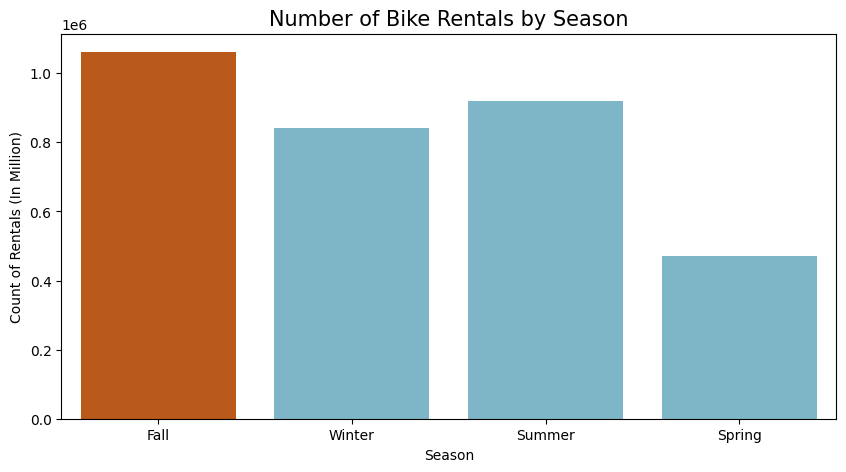

In [20]:
# Hitung total penyewaan per season
byseason_df = day_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={"cnt": "total_cnt"}, inplace=True)

# Definisikan urutan season yang diinginkan (misalnya, Fall di awal)
season_order = ['Fall', 'Winter', 'Summer', 'Spring']

# Buat custom palette dengan warna berbeda untuk Fall
colors = ['#D35400' if season == 'Fall' else '#72BCD4' for season in season_order]

# Urutkan DataFrame berdasarkan season_order
byseason_df = byseason_df.set_index('season').loc[season_order].reset_index()

# Buat bar plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x="season",  # season di sumbu x
    y="total_cnt",  # total_cnt di sumbu y
    data=byseason_df,  # DataFrame yang digunakan
    palette=colors  # Gunakan custom palette
)

# Tambahkan judul dan label
plt.title("Number of Bike Rentals by Season", loc="center", fontsize=15)
plt.ylabel('Count of Rentals (In Million)')
plt.xlabel('Season')
plt.tick_params(axis='x', labelsize=10)

# Tampilkan plot
plt.show()

**Insight:**
- Dari Grafik diatas diketahui bahwa dari 4 musim selama 2 tahun terakhir penyewaan sepeda paling banyak yaitu pada musim gugur. Terdapat 1061129 unit sepeda yang tersewakan baik pengguna registered maupun pengguna casual.

### Pertanyaan 2:

In [22]:
# Mengganti value dari kolom workingday
day_df.workingday.replace({
    0 : "WeekEnd",
    1 : "WeekDay"
}, inplace=True)

- Tahap ini adalah mengganti value pada kolom season dengan metode replace untuk memudahkan dalam membaca visualisasi yang akan dibuat
- Dimana pergantian value tersebut addalah 0:"WeekEnd", 1:"WeekDay"

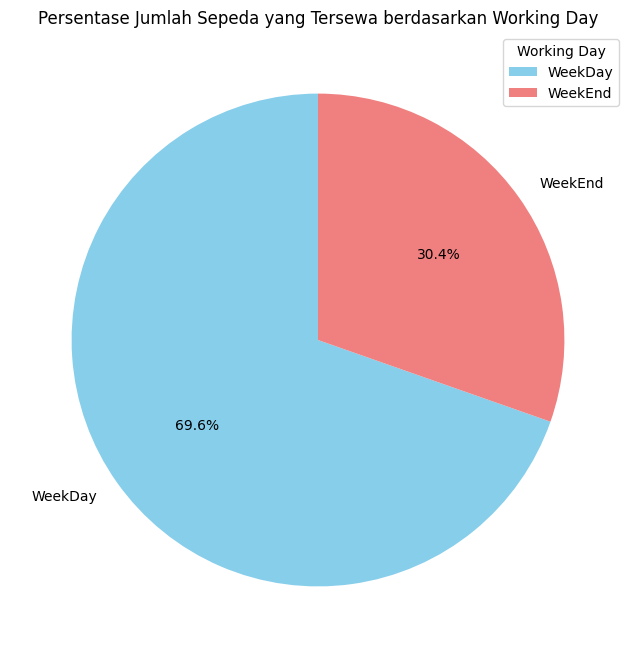

In [23]:
# Hitung total penyewaan sepeda untuk setiap workingday
workingday_counts = day_df.groupby('workingday')['cnt'].sum()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(workingday_counts,
        labels=workingday_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral'])

plt.title('Persentase Jumlah Sepeda yang Tersewa berdasarkan Working Day')
plt.legend(title='Working Day', loc='best')
plt.show()

**Insight:**
- Berdasarkan grafik diatas jumlah penyewaan pada weekday (69.6%) lebih banyak daripada weekend (30.4%).

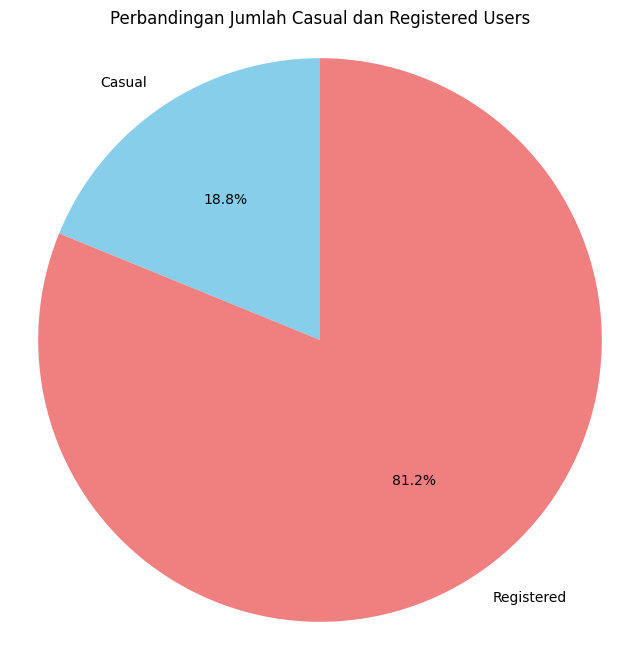

In [24]:
# Hitung total casual dan registered
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Data untuk pie chart
labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Jumlah Casual dan Registered Users')
plt.axis('equal')
plt.show()

**Insight:**
- Dari Grafik diatas diketahui bahwa pengguna yang terdaftar/registered lebih banyak dibandingkan dengan pengguna yang tidak terdaftar/casual. Terdapat 81.2% pengguna registered dan 18.8% pengguna casual.

## Analisis Lanjutan (Opsional)

In [25]:
# --- Clustering dengan Binning ---

# Menentukan kolom yang akan digunakan untuk clustering
cluster_column = 'cnt'

# Menentukan jumlah bin yang diinginkan
num_bins = 5

# Lakukan binning menggunakan pd.cut()
day_df['cluster'] = pd.cut(day_df[cluster_column], bins=num_bins, labels=False)

# Berikan label yang lebih deskriptif untuk setiap bin
cluster_labels = ['Low', 'Medium', 'High', 'Very High', 'Extra High']
day_df['cluster_label'] = pd.cut(day_df[cluster_column], bins=num_bins, labels=cluster_labels)

# Tampilkan hasil clustering
print(day_df[['cnt', 'cluster', 'cluster_label']].head())

    cnt  cluster cluster_label
0   985        0           Low
1   801        0           Low
2  1349        0           Low
3  1562        0           Low
4  1600        0           Low


- Pada tahap ini, dilakukan proses RFM analisis untuk mengelompokkan segmen pengguna (casual dan registered) berdasarkan parameter recency, frequency, dan monetary. Karena dataset tidak mencatat informasi pengguna individu, analisis dilakukan pada level agregat harian untuk masing-masing segmen.

- Tujuan analisis ini adalah untuk mengidentifikasi segmen dengan aktivitas penyewaan tertinggi, baik dari sisi recency (aktivitas terbaru), frequency (jumlah penggunaan), maupun monetary (kontribusi total penyewaan). Dengan pendekatan ini, kita dapat menentukan segmen high-value users, yaitu kelompok yang memberikan kontribusi terbesar terhadap layanan bike-sharing.

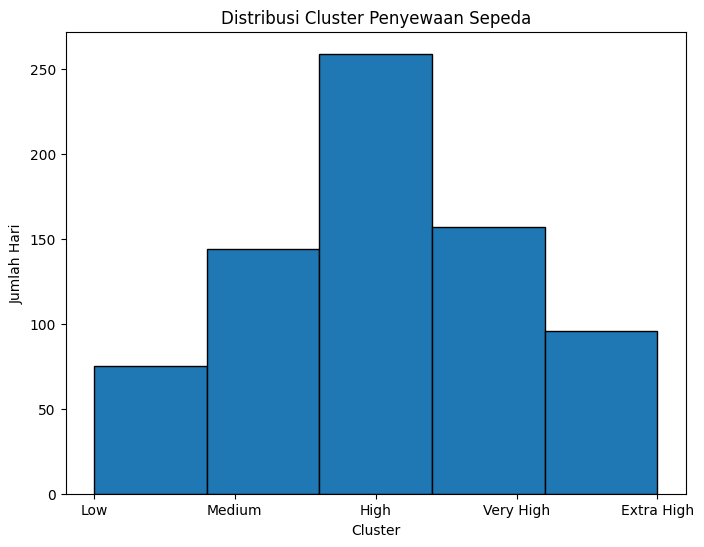

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(day_df['cluster'], bins=num_bins, edgecolor='black')
plt.title('Distribusi Cluster Penyewaan Sepeda')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Hari')
plt.xticks(range(num_bins), cluster_labels)  # Menampilkan label cluster pada sumbu x
plt.show()

- Sebagian besar hari memiliki jumlah penyewaan sepeda dalam kategori 'Medium' dan 'High', menunjukkan bahwa layanan bike-sharing cukup populer dan digunakan secara konsisten.

## Conclusion

- Conclution pertanyaan 1

Berdasarkan analisis data selama dua tahun terakhir, diketahui bahwa dari empat musim yang ada, musim gugur merupakan periode dengan jumlah penyewaan sepeda tertinggi. Total penyewaan yang tercatat mencapai 1.061.129 unit sepeda, yang mencakup baik pengguna terdaftar (registered) maupun pengguna kasual (casual). Hal ini menunjukkan bahwa musim gugur adalah waktu yang paling ideal bagi masyarakat untuk menggunakan layanan bike-sharing, kemungkinan dipengaruhi oleh cuaca yang mendukung dan aktivitas outdoor yang meningkat pada periode tersebut.


- Conclution pertanyaan 2

Berdasarkan analisis data, diketahui bahwa jumlah penyewaan sepeda lebih banyak terjadi pada hari kerja (weekday) dibandingkan akhir pekan (weekend). Penyewaan sepeda pada hari kerja mencakup 69,6% dari total penyewaan, sedangkan akhir pekan hanya menyumbang 30,4%. Hal ini menunjukkan bahwa layanan bike-sharing lebih sering digunakan untuk keperluan rutin, seperti perjalanan ke tempat kerja atau aktivitas harian, dibandingkan dengan aktivitas rekreasi atau santai pada akhir pekan.

- Conclution pertanyaan 3

Hasil analisis menunjukkan bahwa pengguna terdaftar (registered) jauh lebih banyak dibandingkan dengan pengguna tidak terdaftar (casual). Persentase pengguna terdaftar mencapai 81,2%, sedangkan pengguna tidak terdaftar hanya sebesar 18,8%. Hal ini mencerminkan bahwa layanan bike-sharing lebih sering digunakan oleh pelanggan yang memiliki langganan atau akun terdaftar, kemungkinan untuk keperluan rutin seperti perjalanan harian dibandingkan dengan penggunaan sesekali oleh pengguna kasual.